In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/My Drive/TMI /data_holl.csv")

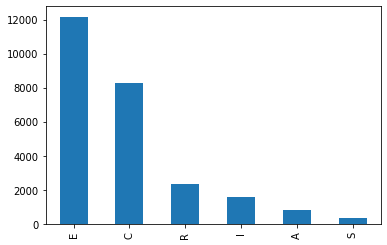

In [ ]:
data['holl2'].value_counts().plot(kind='bar');

In [ ]:
data.loc[data['holl2'] == 'E', 'holl2'] = 0
data.loc[data['holl2'] == 'C', 'holl2'] = 1
data.loc[data['holl2'] == 'R', 'holl2'] = 2
data.loc[data['holl2'] == 'I', 'holl2'] = 3
data.loc[data['holl2'] == 'A', 'holl2'] = 4
data.loc[data['holl2'] == 'S', 'holl2'] = 5
print(data['holl2'][:10])

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: holl2, dtype: object


In [ ]:
#tokenizer = Komoran()
#res = []
#for sentence in data["답변"]:
 # tmp = []
  #tmp = tokenizer.morphs(sentence)
  
 # tokenized = []
  #for token in tmp:
  #    tokenized.append(token)

  #res.append(tokenized)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["답변"], 

                                                    data["holl2"], 

                                                    test_size=0.3, 

                                                    shuffle=True, 

                                                    random_state=1004)

In [ ]:
!pip install Konlpy

In [ ]:
stopwords = ['ㄴ']

In [ ]:
import konlpy
from konlpy.tag import Okt

okt = Okt()

X_train =[]

for sentence in X_train:
  temp_x = []
  temp_x = okt.morphs(sentence, stem=True)
  temp_x = [word for word in temp_x if not word in stopwords]
  X_train.append(temp_x)



X_test =[]

for sentence in X_test:
  temp_x = []
  temp_x = okt.morphs(sentence, stem=True)
  temp_x = [word for word in temp_x if not word in stopwords]
  X_test.append(temp_x)

In [ ]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

제목의 최대 길이 :  1550
제목의 평균 길이 :  237.9720685995196


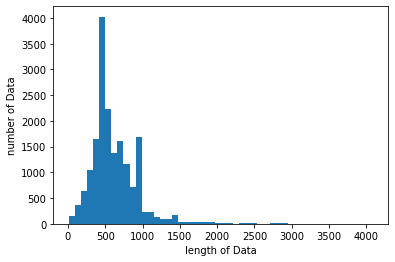

In [ ]:
print("답변 최대 길이 : ", max(len(l) for l in X_train)) 
print("답변 평균 길이 : ", sum(map(len, X_train))/ len(X_train)) 
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


In [ ]:
y_train = np.array(y_train,np.int32)
y_test = np.array(y_test,np.int32)

In [ ]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

max_len = 1550  
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(6))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = stacked_vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers

In [ ]:
y_train.shape

(17901,)

In [ ]:
X_train.shape

(17901, 1550)

In [ ]:
model.fit(X_train2, y_train)
y_pred = model.predict(X_test2)
y_test_ = np.argmax(y_test, axis = 1)
print(accuracy_score(y_pred, y_test_))

In [ ]:
y_train

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
X_train2

array([[   0,    0,    0, ...,   25,    8,  184],
       [   0,    0,    0, ...,    6,   17,   47],
       [   0,    0,    0, ...,  579,    6,   17],
       ...,
       [   0,    0,    0, ..., 6032, 7696,   13],
       [   0,    0,    0, ...,    3,  350,  420],
       [   0,    0,    0, ...,  680, 5577,    1]], dtype=int32)

In [ ]:
import numpy as np

In [ ]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(6, activation='softmax')) 
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 


In [ ]:
history = model.fit(X_train2, y_train, epochs=10, batch_size=10, validation_split=0.1)